# 电信用户流失分析

## 分析背景
* 由于携号转网政策的实施，大量的客户选择其他运营商，使电信用户造成了大量的流失。本文旨在探索用户流失的原因，流失的用户具有哪些特征，该如何制定相应的政策等问题。

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
D:\python\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## 理解与清洗数据

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7537-RBWEA,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


* 发现TotalCharges有11个空值，进行观察填补

In [7]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
data.tenure.value_counts().sort_index()[:5]

0     11
1    613
2    238
3    200
4    176
Name: tenure, dtype: int64

* **发现11个空值，都是订阅时间为0的新顾客，只交了当月的月租，所以TotalCharges应填入月费金额,tenure应填为1**

In [9]:
data.loc[data['TotalCharges']==' ','TotalCharges'] = data.loc[data['TotalCharges']==' ','MonthlyCharges']
data.loc[data['TotalCharges']==' ','tenure'] = 1

* 修改数据类型

In [10]:
cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in cols:
    data[col]=data[col].map({'Yes':1,'No':0})

data['TotalCharges'] = data['TotalCharges'].astype(float)
data.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.798992,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.730170,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [11]:
data['MultipleLines'] = data['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})

cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for col in cols:
    data[col] = data[col].map({'Yes':1,'No':0,'No internet service':0})
    data[col] = pd.to_numeric(data[col],downcast='integer')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00
TechSupport,7043.0,0.290217,0.453895,0.00,0.00,0.00,1.00,1.00


* **该样本中包含26.5%流失率，6.2%的老人，48.3%的人有配偶，30%的人有子女**
* **有60%的顾客连续使用时间不及3年**
* **有超过一半的用户月租大于平均金额64元**
* **平均年度消费金额远大于按月计算的年度消费金额，可见存在额外项目的一次性费用**

## 假设

1. **流失客户主要以个人用户为主，年轻人占多数**
2. **月租高是导致个人用户流失的主要原因之一**
3. **有配偶与儿女的用户使用时间较长**
4. **高消费的顾客倾向于签订长期合同，并伴有多个额外项目**
5. **附加项目的高费用也是导致个人顾客流失的原因之一**
6. **互联网服务导致用户的流失**

## 可视化分析

In [12]:
# 分类数据 - 
# customerID（删对后期分析没用）
# 2类 - gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn
# 3类 - PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
# 4类 - PaymentMethod
# 数值数据 - tenure, MonthlyCharges,TotalCharges

### SeniorCitizen

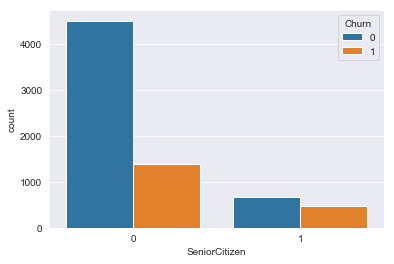

老年用户较少，流失最多的年轻人


In [19]:
sns.countplot(data=data,x='SeniorCitizen',hue='Churn')
plt.show()
print('老年用户较少，流失最多的年轻人')

### gender

性别与客户是否流失无显著性关系


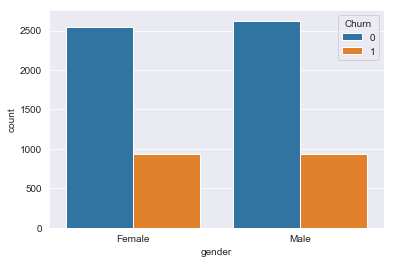

In [15]:
sns.countplot(data['gender'],hue=data['Churn'])
print('性别与客户是否流失无显著性关系')

### Dependents & Partner

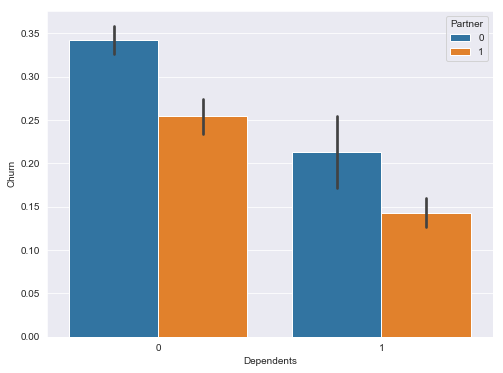

无子女和配偶的人流失率最大，流失最小的是有子女有配偶的用户
亲人是影响流失的重要因素之一


In [39]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,y='Churn',x='Dependents',hue='Partner',orient='v')
plt.show()

print('无子女和配偶的人流失率最大，流失最小的是有子女有配偶的用户')
print('亲人是影响流失的重要因素之一')

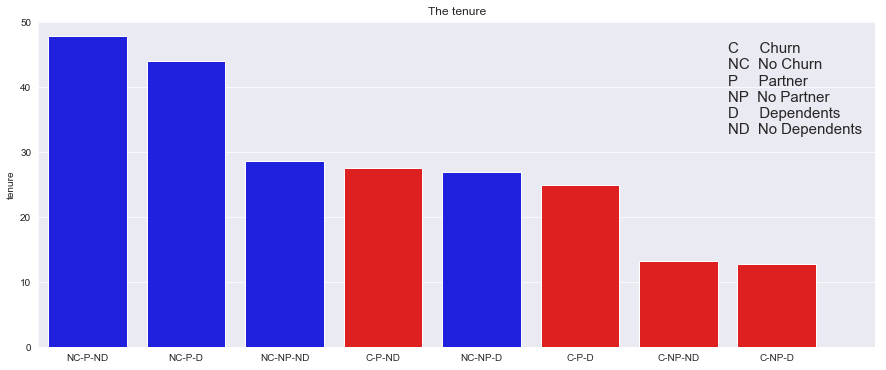

无子女与无配偶的顾客平均使用时间最短
因此可推测因为用户无子女无配偶所以使用时间短导致流失,使用时间与流失是间接相关关系


In [43]:
t = data[['Partner','Dependents','Churn','tenure']].groupby(['Churn','Partner','Dependents']).mean().sort_values(by='tenure',ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=t,y='tenure',x=t.index,palette=['blue','blue','blue','red','blue','red','red','red'])
plt.xticks(range(9),['NC-P-ND','NC-P-D','NC-NP-ND','C-P-ND','NC-NP-D','C-P-D','C-NP-ND','C-NP-D'])
plt.title('The tenure')
plt.text(x=6.5,y=47,s='C     Churn\nNC  No Churn\nP     Partner\nNP  No Partner\nD     Dependents\nND  No Dependents',verticalalignment='top',fontsize=15)
plt.show()

print('无子女与无配偶的顾客平均使用时间最短')
print('因此可推测因为用户无子女无配偶所以使用时间短导致流失,使用时间与流失是间接相关关系')

# tenure & Contract

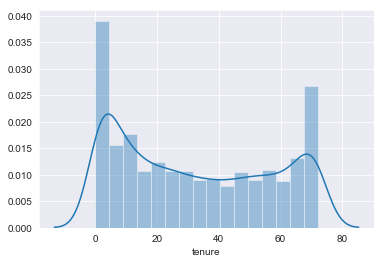

使用时间呈双峰分布,使用时间长的用户粘性较大,不易流失，哪些客户粘性大呢？如何挽回低使用时长的用户呢？


In [44]:
sns.distplot(data['tenure'])
plt.show()
print('使用时间呈双峰分布,使用时间长的用户粘性较大,不易流失，哪些客户粘性大呢？如何挽回低使用时长的用户呢？')

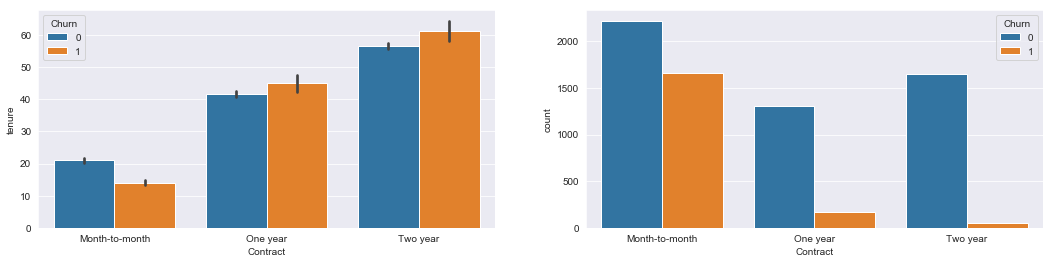

使用时间也长的客户大多是签订合同时间长的客户，流失也较少，可见长期客户有较强的用户粘性
所以流失的客户主要是按月签合同的个人用户，将其加入模型，可将合同时长分为长期用户和短期用户


In [45]:
fig,axes = plt.subplots(1,2,figsize=(18,4))
sns.barplot(data=data,x='Contract',y='tenure',hue='Churn',ax=axes[0])
sns.countplot(data=data,x='Contract',hue='Churn',ax=axes[1])
plt.show()

print('使用时间也长的客户大多是签订合同时间长的客户，流失也较少，可见长期客户有较强的用户粘性')
print('所以流失的客户主要是按月签合同的个人用户，将其加入模型，可将合同时长分为长期用户和短期用户')

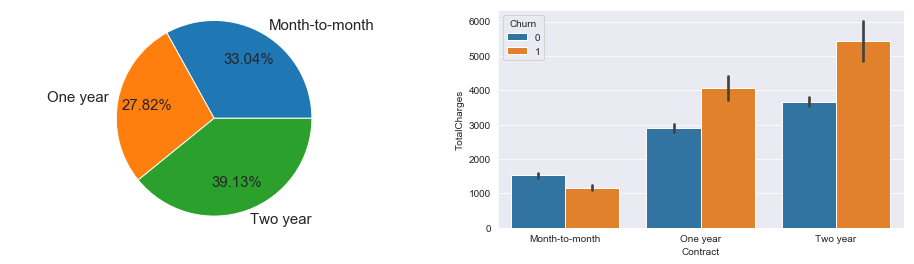

长期用户才是主要的利润来源，增加利润的方式就是使短期用户变为长期用户


In [19]:
ct = data[['Contract','TotalCharges']].groupby('Contract').sum().reset_index()

fig,axes = plt.subplots(1,2,figsize=(16,4))
axes[0].pie(ct['TotalCharges'],labels=ct['Contract'],autopct='%.2f%%',pctdistance=0.7,textprops={'fontsize':15})
axes[0].axis('equal')
sns.barplot(data=data,x='Contract',y='TotalCharges',hue='Churn',ax=axes[1])
plt.show()

print('长期用户才是主要的利润来源，增加利润的方式就是使短期用户变为长期用户')

## Phone Service

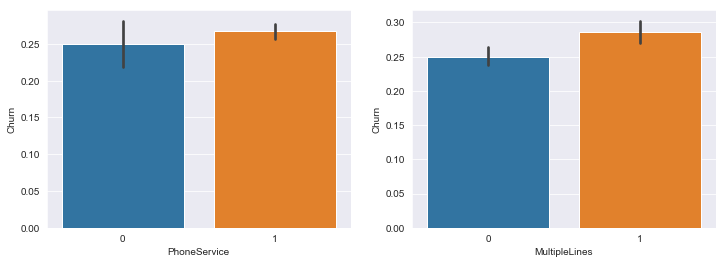

电话服务对用户流失的影响不大


In [57]:
cols = ['PhoneService','MultipleLines']
fig,axes = plt.subplots(1,2,figsize=(12,4))
for col,i in zip(cols,range(2)):
    sns.barplot(data=data,x=col,y='Churn',orient='v',ax=axes[i])
plt.show()

print('电话服务对用户流失的影响不大')

## Internet Service

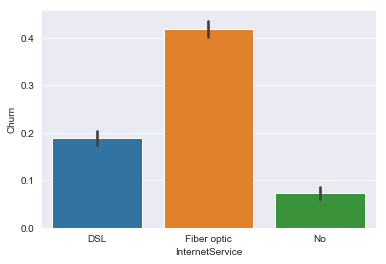

拥有互联网服务的用户流失较大，特别是选择Fiber optic的用户，选择DSL的用户流失率较大


In [60]:
sns.barplot(data=data,x='InternetService',y='Churn')
plt.show()

print('拥有互联网服务的用户流失较大，特别是选择Fiber optic的用户，选择DSL的用户流失率较大')

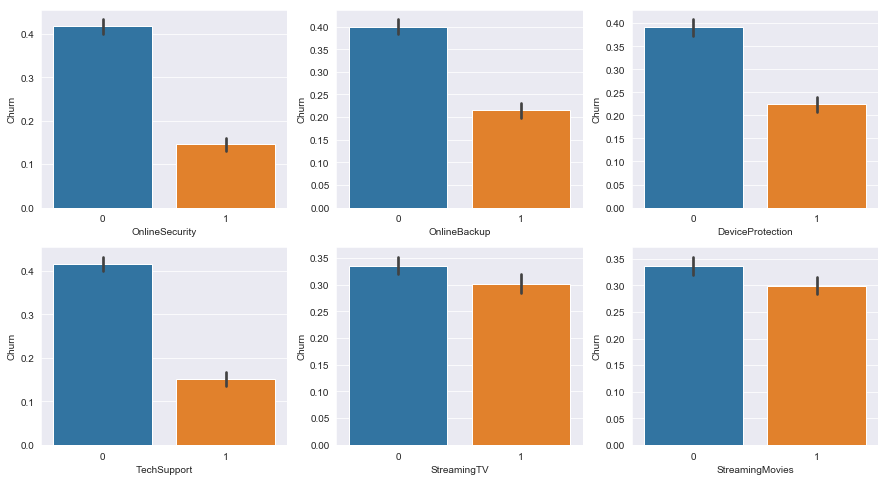

除了流媒体业务外，其余所有项目均表现出没有与有之间的显著性差异
需要针对不同的客户制定不同的额外项目服务


In [95]:
# OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies

internet = data[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']]
internet = internet[internet['InternetService']!='No']
postion = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
fig,axes = plt.subplots(2,3,figsize=(15,8))

for i,z in zip(internet.columns.tolist()[1:-1],postion):    
    sns.barplot(data=internet,y='Churn',x=i,ax=axes[z])
plt.show()

print('除了流媒体业务外，其余所有项目均表现出没有与有之间的显著性差异')
print('需要针对不同的客户制定不同的额外项目服务')

## Payment Method

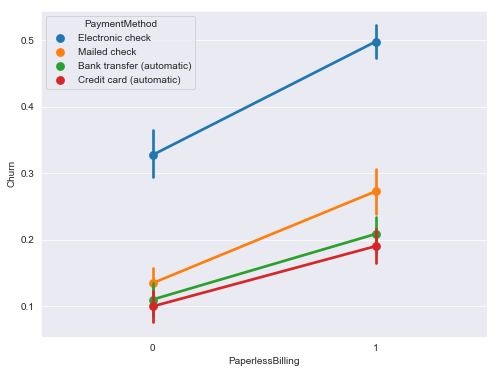

流失率最大是选择电子支付和无纸化账单的用户，而选择自动支付与电子邮件支付的用户流失率较少，推测是因为人们很少关注的原因


In [102]:
plt.figure(figsize=(8,6))
sns.pointplot(data=data,y='Churn',x='PaperlessBilling',hue='PaymentMethod')
plt.show()
print('流失率最大是选择电子支付和无纸化账单的用户，而选择自动支付与电子邮件支付的用户流失率较少，推测是因为人们很少关注的原因')

## Charges

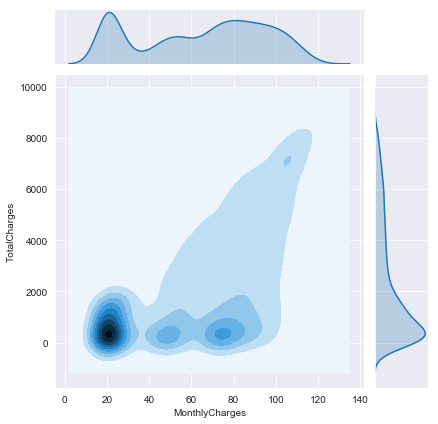

大量用户的年消费持续在最低处，月消费在20与80两个点上有大量用户，每类用户的流失率如何呢？


In [123]:
sns.jointplot(kind='kde',data=data,x='MonthlyCharges',y='TotalCharges')
plt.show()
print('大量用户的年消费持续在最低处，月消费在20与80两个点上有大量用户，每类用户的流失率如何呢？')